# Banking Risk Analytics: Understanding Loan Default Drivers via EDA

### Problem Statement:
This case study focuses on identifying patterns that indicate whether a client is likely to face difficulties in repaying their loan instalments.
The objective is to leverage Exploratory Data Analysis (EDA) to uncover key factors that influence loan default. These insights can help a bank make informed decisions, such as rejecting high-risk applications, adjusting loan amounts, or offering loans at higher interest rates to risk-prone applicants.

By understanding the variables most strongly associated with default, the bank can improve its credit risk assessment, minimize financial losses, and ensure that creditworthy clients are not unfairly denied access to loans. Ultimately, the goal is to support data-driven decision-making in loan approval and risk management processes.

#### Steps Involved

- Data Loading
- Initial Explolations
- Data Cleaning and Handling Missing Values
- Handling Outliers (if any)
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

Importing the required libraries

In [1]:
import numpy as np  # To perform mathematical opeartions
import pandas as pd # To perform analysis on the data
import matplotlib.pyplot as plt # For Visualisation
import seaborn as sns # For Visualisation

pd.set_option('display.max_columns', 500) # This sets the limit to 500 columns to display
pd.set_option('display.max_rows', 500)# This sets the limit to 500 row to display

1. Loading the dataset

In [2]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\application_data.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

2. Initial Explorations

In [3]:
# Checking the shape of the dataset
df.shape

(307511, 122)

Data contains 307511 rows and 122 columns

In [4]:
# Checking the overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
# Checking the statistical summary of the data
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [6]:
# Checking the % of missing values
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

Dropping the columns having >= 40% missing values

In [7]:
missing_cols = (df.isnull().sum() / len(df) * 100)
cols_to_drop = missing_cols[missing_cols>40].index
df.drop(columns=cols_to_drop, inplace=True)

In [8]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

#### Handling Missing Values

1. `OCCUPATION_TYPE`

In [9]:
df.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [10]:
df.OCCUPATION_TYPE.isnull().sum()

96391

OCCUPATION_TYPE is an important column as it directly affects the one in repaying the loan, So:
- We can't drop the entire column as it's valuable
- We can't drop the missing rows also as the number is very high (96391 rows)
- Now we have two options:
  1. Impute with the mode(most frequent occupation)
  2. Add another category `Unknown` in the place of Na's

In [11]:
# Adding unknown category to the place of missing values
df['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_11052\2669476285.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)


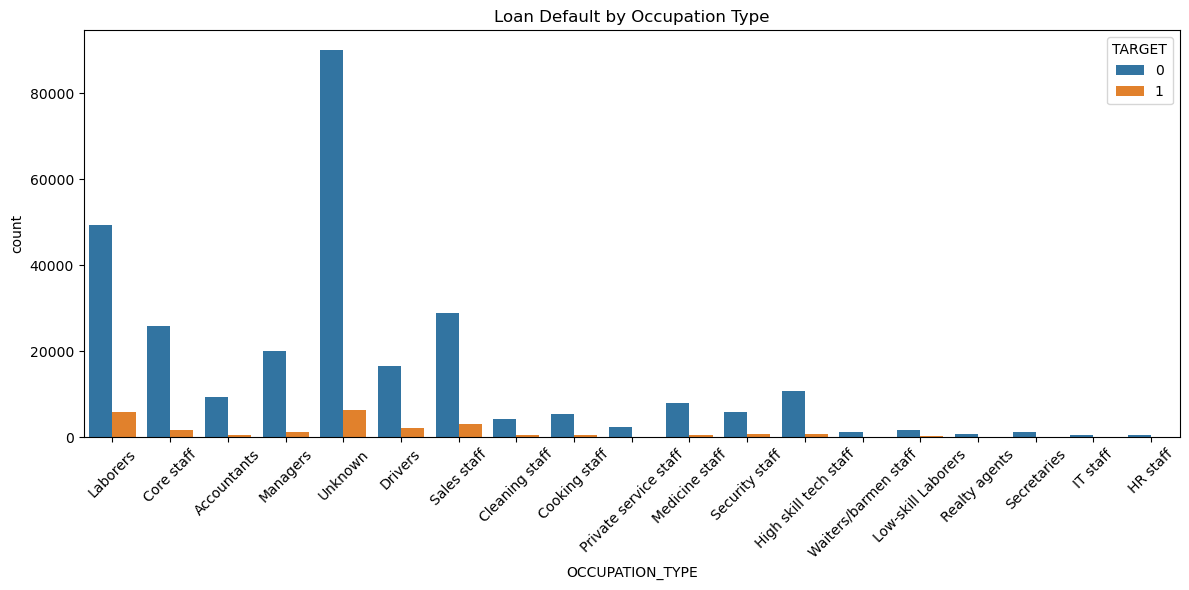

In [12]:
# Visualising the effect of `Occupation_Type` Column on the `Target` column
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='OCCUPATION_TYPE', hue='TARGET')
plt.xticks(rotation=45)
plt.title("Loan Default by Occupation Type")
plt.tight_layout()
plt.show()

2. `EXT_SOURCE_3`

In [13]:
df.EXT_SOURCE_3.dtype

dtype('float64')

In [14]:
df.EXT_SOURCE_3.skew()

-0.4093904596160267

So the data is slightly left skewed, will impute with median which is robust to the outliers also

In [15]:
df['EXT_SOURCE_3'].fillna(df['EXT_SOURCE_3'].median(), inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_11052\1449450369.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EXT_SOURCE_3'].fillna(df['EXT_SOURCE_3'].median(), inplace=True)


3. `AMT_REQ_CREDIT_BUREAU_YEAR`

In [16]:
df.AMT_REQ_CREDIT_BUREAU_YEAR.dtype

dtype('float64')

In [17]:
df.AMT_REQ_CREDIT_BUREAU_YEAR.skew()

1.243590004141659

In [18]:
df.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

Since the data is rightly skewed , mean is > median and as the data type is numerical again will impute with median as it handles both skweness and outliers

In [19]:
df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df['AMT_REQ_CREDIT_BUREAU_YEAR'].median(), inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_11052\2466469216.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df['AMT_REQ_CREDIT_BUREAU_YEAR'].median(), inplace=True)


Similarly, We have the related columns like
AMT_REQ_CREDIT_BUREAU_MON      
AMT_REQ_CREDIT_BUREAU_WEEK     
AMT_REQ_CREDIT_BUREAU_DAY      
AMT_REQ_CREDIT_BUREAU_HOUR 

Let's check the correlation for these columns with the target variable and will take a decision

In [20]:
df.select_dtypes(include='number').corr()['TARGET'].sort_values(ascending=False)

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
FLAG_WORK_PHONE                0.028524
CNT_CHILDREN                   0.019187
AMT_REQ_CREDIT_BUREAU_YEAR     0.012161
CNT_FAM_MEMBERS                0.009308
OBS_30_CNT_SOCIAL_CIRCLE       0.009131
OBS_60_CNT_SOCIAL_CIRCLE       0.009022
REG_REGION_NOT_WORK_REGION     0.006942
REG_REGION_NOT_LIVE_REGION     0.005576
FLAG_DOCUMENT_2                0.005417
FLAG_DOCUMENT_21               0.003709
LIVE_REGION_NOT_WORK_REGION    0.002819


From these values `AMT_REQ_CREDIT_BUREAU_YEAR` has the highest correlation among the related columns so, let's keep this and drop others such as 
1. 'AMT_REQ_CREDIT_BUREAU_QRT',
2. 'AMT_REQ_CREDIT_BUREAU_MON',
3. 'AMT_REQ_CREDIT_BUREAU_WEEK',
4. 'AMT_REQ_CREDIT_BUREAU_DAY',
5. 'AMT_REQ_CREDIT_BUREAU_HOUR'

In [21]:
cols_to_drop = ['AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_HOUR' ]
df.drop(columns = cols_to_drop, inplace=True)

Before proceeding further let's drop the unwanted columns

In [22]:
irrelevant_columns = ['DAYS_REGISTRATION','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                   'FLAG_PHONE','FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION',
                   'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','DAYS_LAST_PHONE_CHANGE',
                  'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
                  'NAME_TYPE_SUITE']
df.drop(columns=irrelevant_columns, inplace=True)

In [23]:
# Let's check the null values again
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
SK_ID_CURR                     0.000000
FLAG_DOCUMENT_10               0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000
FLAG_DOCUMENT_4                0.000000
FLAG_DOCUMENT_5                0.000000
FLAG_DOCUMENT_6                0.000000
FLAG_DOCUMENT_7                0.000000
FLAG_DOCUMENT_8                0.000000
FLAG_DOCUMENT_9                0.000000
FLAG_DOCUMENT_12               0.000000
FLAG_DOCUMENT_11               0.000000
FLAG_DOCUMENT_13               0.000000
FLAG_DOCUMENT_14               0.000000
FLAG_DOCUMENT_15               0.000000
FLAG_DOCUMENT_16               0.000000
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_21               0.000000


Let's continue with handling the missing values

4. `EXT_SOURCE_2`

In [24]:
df.EXT_SOURCE_2.dtype

dtype('float64')

In [25]:
df.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [26]:
df.EXT_SOURCE_2.skew()

-0.7935760449636996

Since values are all positive and near zero minimum, log1p transform can be applied safely to reduce skew:

In [27]:
df['EXT_SOURCE_2_log'] = np.log1p(df['EXT_SOURCE_2'])

In [28]:
df.EXT_SOURCE_2.skew()

-0.7935760449636996

Even after applying transformation, there is no change in the skewness so let's impute with median which is safe and robust

In [29]:
median_value = df['EXT_SOURCE_2'].median()
df['EXT_SOURCE_2'].fillna(median_value, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_11052\3075193598.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EXT_SOURCE_2'].fillna(median_value, inplace=True)


5. `AMT_GOOD_PRICE` 

In [30]:
# Visualising the effect of `Occupation_Type` Column on the `Target` column
df.AMT_GOODS_PRICE.dtype

dtype('float64')

In [31]:
df.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

Let's impute with median

In [32]:
median_goods_price = df['AMT_GOODS_PRICE'].median()
df['AMT_GOODS_PRICE'].fillna(median_goods_price, inplace=True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_11052\3770784407.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AMT_GOODS_PRICE'].fillna(median_goods_price, inplace=True)


6. `AMT_ANNUITY`

In [33]:
df.AMT_ANNUITY.dtype

dtype('float64')

In [34]:
df.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [35]:
df.AMT_ANNUITY.skew()

1.5797773638612507

Here also , rather than dropping the rows will just impute with the median

In [36]:
df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].median(), inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_11052\990069574.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].median(), inplace=True)


Let's check the missing values again

In [37]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

EXT_SOURCE_2_log               0.214626
CNT_FAM_MEMBERS                0.000650
FLAG_DOCUMENT_11               0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000
FLAG_DOCUMENT_4                0.000000
FLAG_DOCUMENT_5                0.000000
FLAG_DOCUMENT_6                0.000000
FLAG_DOCUMENT_7                0.000000
FLAG_DOCUMENT_8                0.000000
FLAG_DOCUMENT_9                0.000000
FLAG_DOCUMENT_10               0.000000
FLAG_DOCUMENT_12               0.000000
EXT_SOURCE_2                   0.000000
FLAG_DOCUMENT_13               0.000000
FLAG_DOCUMENT_14               0.000000
FLAG_DOCUMENT_15               0.000000
FLAG_DOCUMENT_16               0.000000
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_21               0.000000
AMT_REQ_CREDIT_BUREAU_YEAR     0.000000
EXT_SOURCE_3                   0.000000


In [38]:
df.EXT_SOURCE_2.isnull().sum()

0

In [39]:
df.drop(columns=['EXT_SOURCE_2_log'], inplace=True)

7. `CNT_FAM_MEMEBRS`

In [40]:
df.CNT_FAM_MEMBERS.dtype

dtype('float64')

In [41]:
df.CNT_FAM_MEMBERS.value_counts()

CNT_FAM_MEMBERS
2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: count, dtype: int64

In [42]:
df.CNT_FAM_MEMBERS.isnull().sum()

2

Since missing value is too low, let's drop those rows

In [43]:
df = df.dropna(subset=['CNT_FAM_MEMBERS'])

##### All the missing values has been handled.

Let's have a look on the data and the shape after the cleaning

In [44]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-2120,Laborers,1.0,2,2,0,0,Business Entity Type 3,0.262949,0.139376,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-291,Core staff,2.0,1,1,0,0,School,0.622246,0.535276,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-2531,Laborers,1.0,2,2,0,0,Government,0.555912,0.729567,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-2437,Laborers,2.0,2,2,0,0,Business Entity Type 3,0.650442,0.535276,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-3458,Core staff,1.0,2,2,0,0,Religion,0.322738,0.535276,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In the dataset,
1. DAYS_BIRTH
2. DAYS_EMPLOYED
3. DAYS_ID_PUBLISH
- Have -ve values as well, which is common in banking sector which means the date before the loan application
   For Eg: -12000 means, user born 12000 days before applying the loan
   Rather than taking the abs, will just conver to to years

In [45]:
df['YEARS_BIRTH'] = df['DAYS_BIRTH'] / 365
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'] / 365

In [46]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-2120,Laborers,1.0,2,2,0,0,Business Entity Type 3,0.262949,0.139376,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,-25.920548,-1.745205
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-291,Core staff,2.0,1,1,0,0,School,0.622246,0.535276,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,-45.931507,-3.254795
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-2531,Laborers,1.0,2,2,0,0,Government,0.555912,0.729567,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,-52.180822,-0.616438
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-2437,Laborers,2.0,2,2,0,0,Business Entity Type 3,0.650442,0.535276,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,-52.068493,-8.326027
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-3458,Core staff,1.0,2,2,0,0,Religion,0.322738,0.535276,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,-54.608219,-8.323288


In [47]:
df['YEARS_BIRTH'] = df['YEARS_BIRTH'].abs().round(2)
df['YEARS_EMPLOYED'] = df['YEARS_EMPLOYED'].abs().round(2)

In [48]:
df.drop(columns=['DAYS_BIRTH', 'DAYS_EMPLOYED'], inplace=True)

In [49]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-2120,Laborers,1.0,2,2,0,0,Business Entity Type 3,0.262949,0.139376,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,25.92,1.75
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-291,Core staff,2.0,1,1,0,0,School,0.622246,0.535276,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,45.93,3.25
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-2531,Laborers,1.0,2,2,0,0,Government,0.555912,0.729567,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,52.18,0.62
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-2437,Laborers,2.0,2,2,0,0,Business Entity Type 3,0.650442,0.535276,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,52.07,8.33
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3458,Core staff,1.0,2,2,0,0,Religion,0.322738,0.535276,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,54.61,8.32


#### Handling Outliers

In [50]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} --> outliers count: {len(outliers)}")


SK_ID_CURR --> outliers count: 0
TARGET --> outliers count: 24825
CNT_CHILDREN --> outliers count: 4272
AMT_INCOME_TOTAL --> outliers count: 14034
AMT_CREDIT --> outliers count: 6562
AMT_ANNUITY --> outliers count: 7504
AMT_GOODS_PRICE --> outliers count: 14728
REGION_POPULATION_RELATIVE --> outliers count: 8412
DAYS_ID_PUBLISH --> outliers count: 0
CNT_FAM_MEMBERS --> outliers count: 4007
REGION_RATING_CLIENT --> outliers count: 80527
REGION_RATING_CLIENT_W_CITY --> outliers count: 78027
REG_REGION_NOT_LIVE_REGION --> outliers count: 4657
REG_REGION_NOT_WORK_REGION --> outliers count: 15611
EXT_SOURCE_2 --> outliers count: 0
EXT_SOURCE_3 --> outliers count: 4313
FLAG_DOCUMENT_2 --> outliers count: 13
FLAG_DOCUMENT_3 --> outliers count: 0
FLAG_DOCUMENT_4 --> outliers count: 25
FLAG_DOCUMENT_5 --> outliers count: 4647
FLAG_DOCUMENT_6 --> outliers count: 27078
FLAG_DOCUMENT_7 --> outliers count: 58
FLAG_DOCUMENT_8 --> outliers count: 25024
FLAG_DOCUMENT_9 --> outliers count: 1198
FLAG_DO

In [51]:
cols_to_cap = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_REQ_CREDIT_BUREAU_YEAR']

for col in cols_to_cap:
    lower_cap = df[col].quantile(0.01)
    upper_cap = df[col].quantile(0.99)
    df[col] = df[col].clip(lower=lower_cap, upper=upper_cap)

Checking whther cliping worked or not

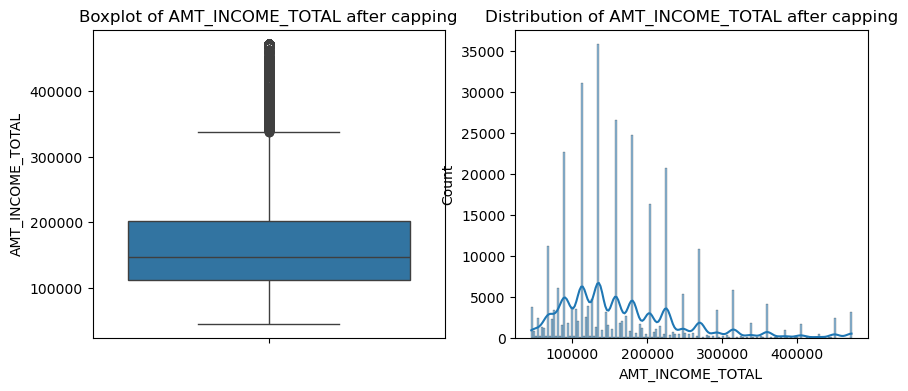

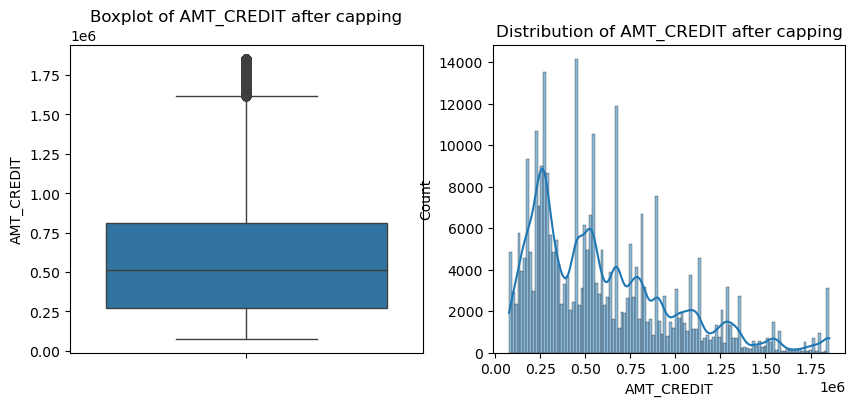

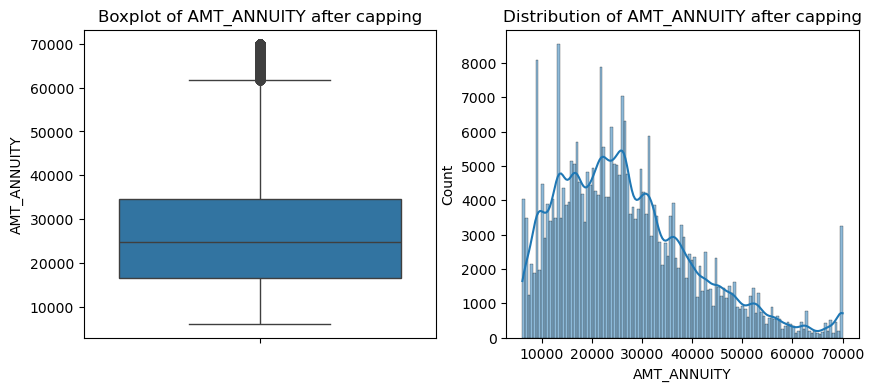

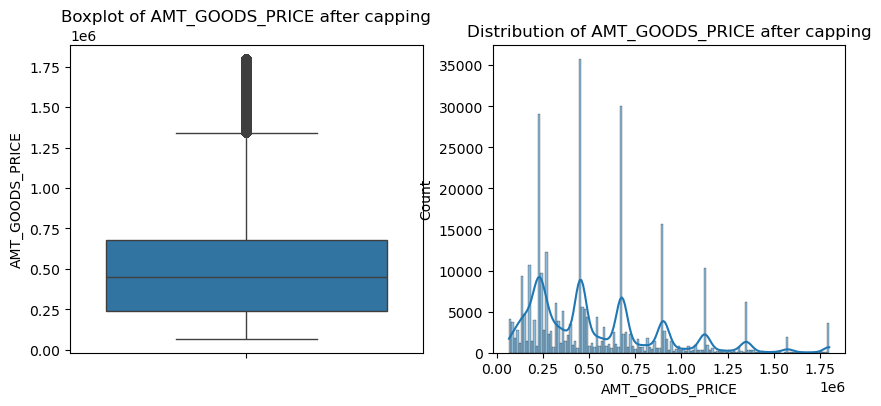

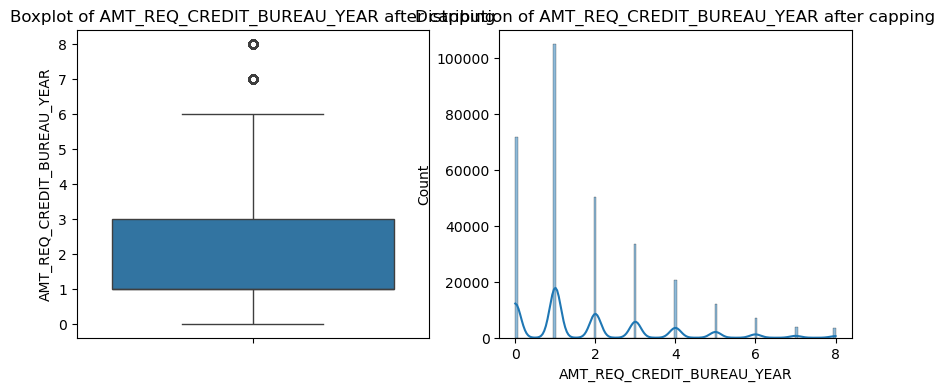

In [52]:
for col in cols_to_cap:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col} after capping')
    plt.subplot(1,2,2)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col} after capping')
    plt.show()

“continuous” capped outliers after clipping is normal and expected

#### Univariate and Bivariate Analysis

In [53]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'F

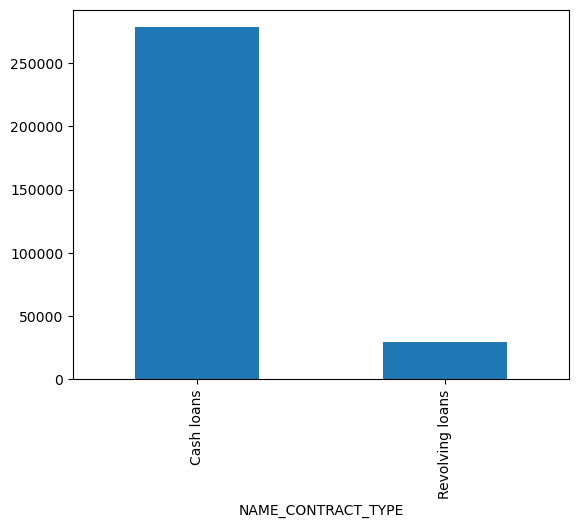

In [54]:
df.NAME_CONTRACT_TYPE.value_counts().plot.bar()
plt.show()

Graph Insights:
> Cash Loans are more than Revolving Loans

Now Let's see in b/w these two who are more defaulters

In [55]:
defaulters = df[df.TARGET ==1]
non_defaulters = defaulters = df[df.TARGET ==0]

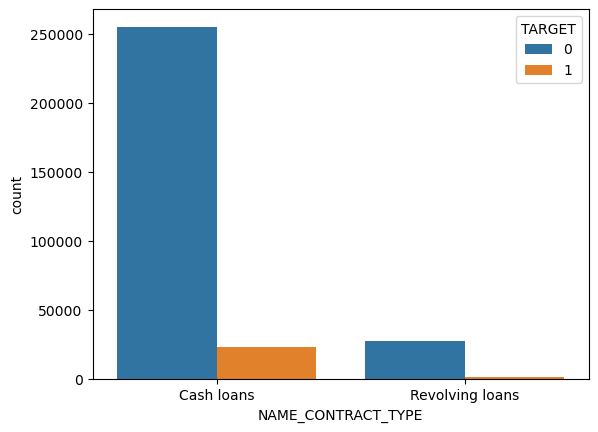

In [56]:
sns.countplot(data=df, x='NAME_CONTRACT_TYPE', hue='TARGET')
plt.show()

##### Cash loan customers are also more and they are the more defaulters

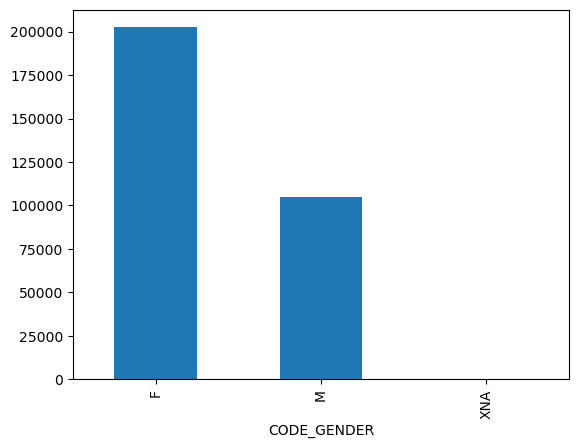

In [57]:
df.CODE_GENDER.value_counts().plot.bar()
plt.show()

Graph Insights:
> Females are more than Male

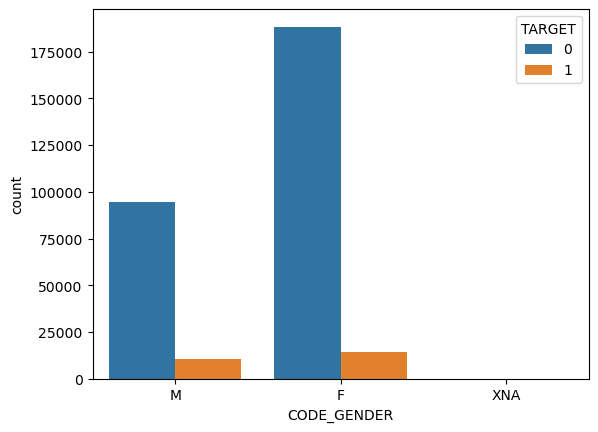

In [58]:
sns.countplot(data=df, x='CODE_GENDER', hue='TARGET')
plt.show()

##### Females are more defaulters

<Axes: xlabel='OCCUPATION_TYPE'>

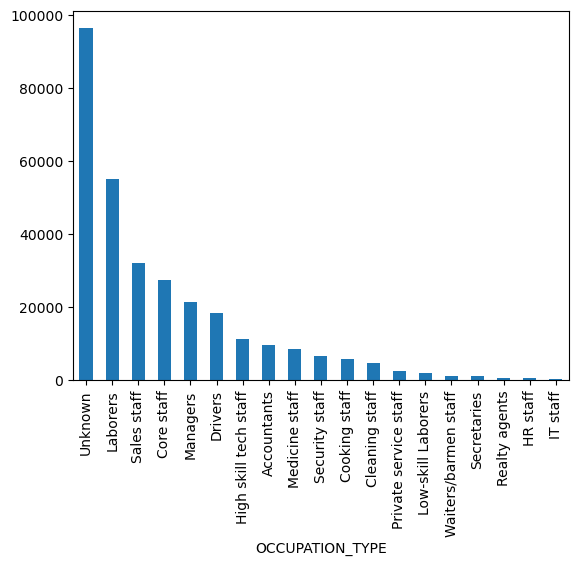

In [59]:
df.OCCUPATION_TYPE.value_counts().plot.bar()

Graph Insights:
> Occupation of Customers which is Unknown are more than comes the Laborers

In [60]:
grouped = df.groupby(['OCCUPATION_TYPE', 'CODE_GENDER', 'TARGET']).size().reset_index(name='count')

In [61]:
grouped

,OCCUPATION_TYPE,CODE_GENDER,TARGET,count
0,Accountants,F,0,9071
1,Accountants,F,1,457
2,Accountants,M,0,267
3,Accountants,M,1,17
4,Cleaning staff,F,0,3904
5,Cleaning staff,F,1,410
6,Cleaning staff,M,0,302
7,Cleaning staff,M,1,37
8,Cooking staff,F,0,4830
9,Cooking staff,F,1,555


C:\Users\Dell\AppData\Local\Temp\ipykernel_11052\585435556.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


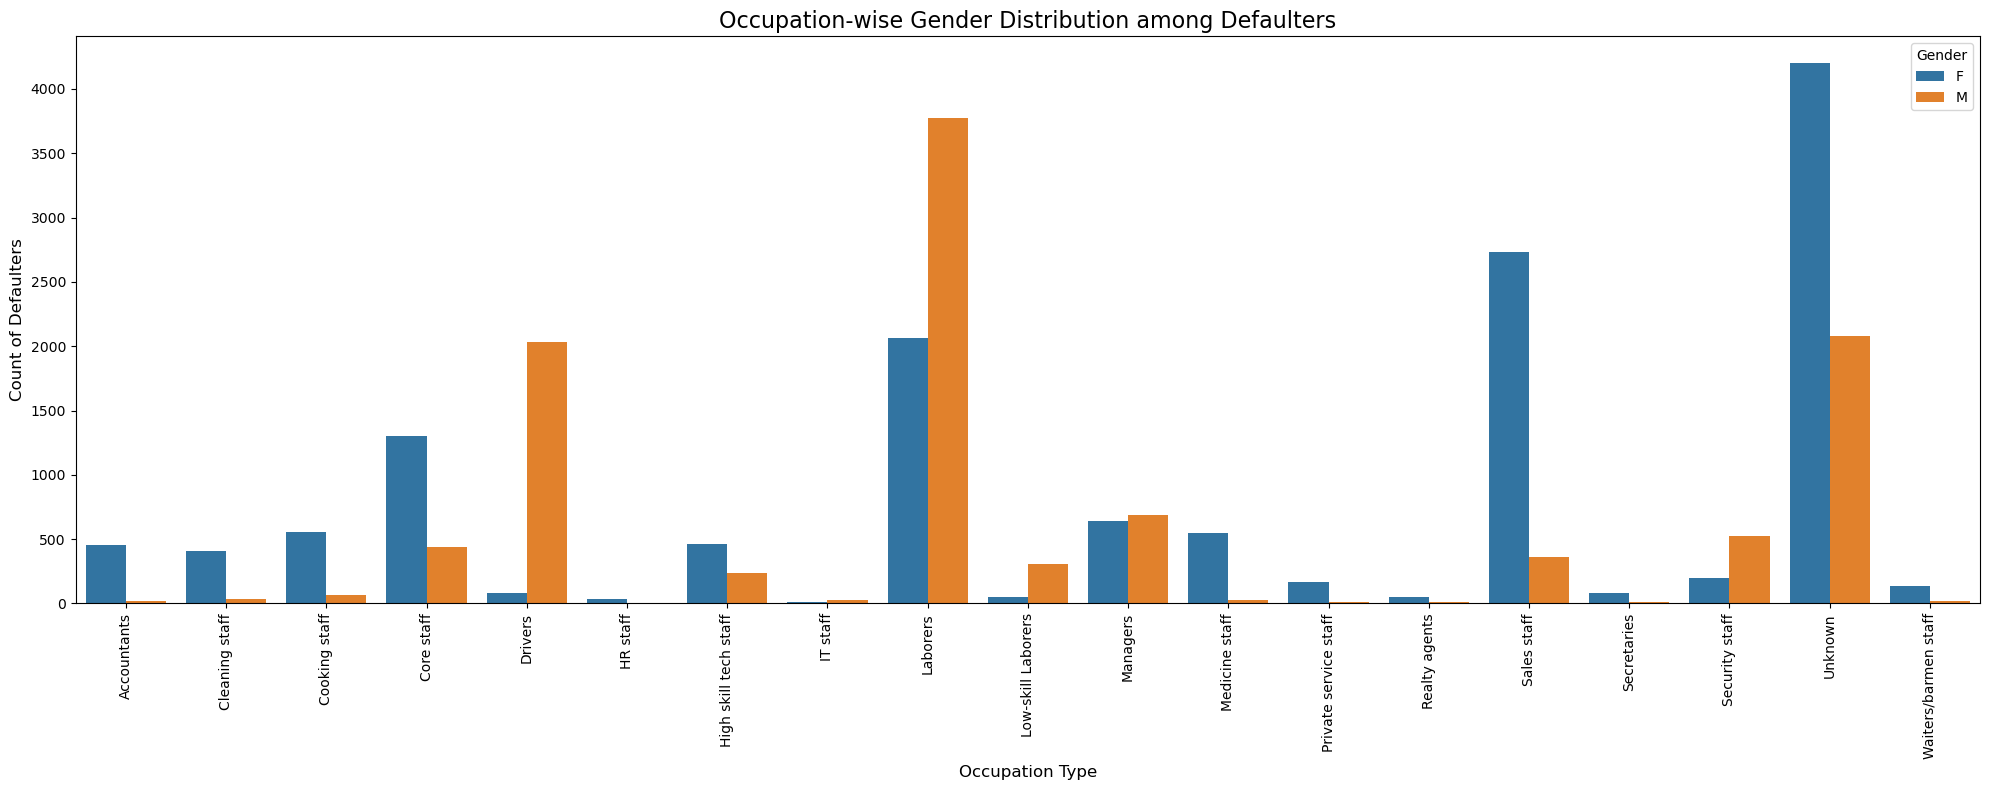

In [62]:
# Filter for defaulters only
defaulters_data = grouped[grouped['TARGET'] == 1]

plt.figure(figsize=(20, 8))
sns.barplot(
    data=defaulters_data,
    x='OCCUPATION_TYPE',
    y='count',
    hue='CODE_GENDER',
    ci=None
)
plt.title('Occupation-wise Gender Distribution among Defaulters', fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Occupation Type', fontsize=12)
plt.ylabel('Count of Defaulters', fontsize=12)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

This gave the count of female and male defaulaters in each occupation
From this,
1. Male who are labourers are more defaulters
2. Females who's occupation is not known are more defaulters
3. Female Sales Stafs's are more defaulters

##### Housing Type wise Gender v/s Target

In [63]:
gp_2 = df.groupby(['NAME_HOUSING_TYPE', 'CODE_GENDER', 'TARGET']).size().reset_index(name='count')
gp_2

,NAME_HOUSING_TYPE,CODE_GENDER,TARGET,count
0,Co-op apartment,F,0,625
1,Co-op apartment,F,1,49
2,Co-op apartment,M,0,408
3,Co-op apartment,M,1,40
4,House / apartment,F,0,169313
5,House / apartment,F,1,12278
6,House / apartment,M,0,82279
7,House / apartment,M,1,8994
8,House / apartment,XNA,0,3
9,Municipal apartment,F,0,7288


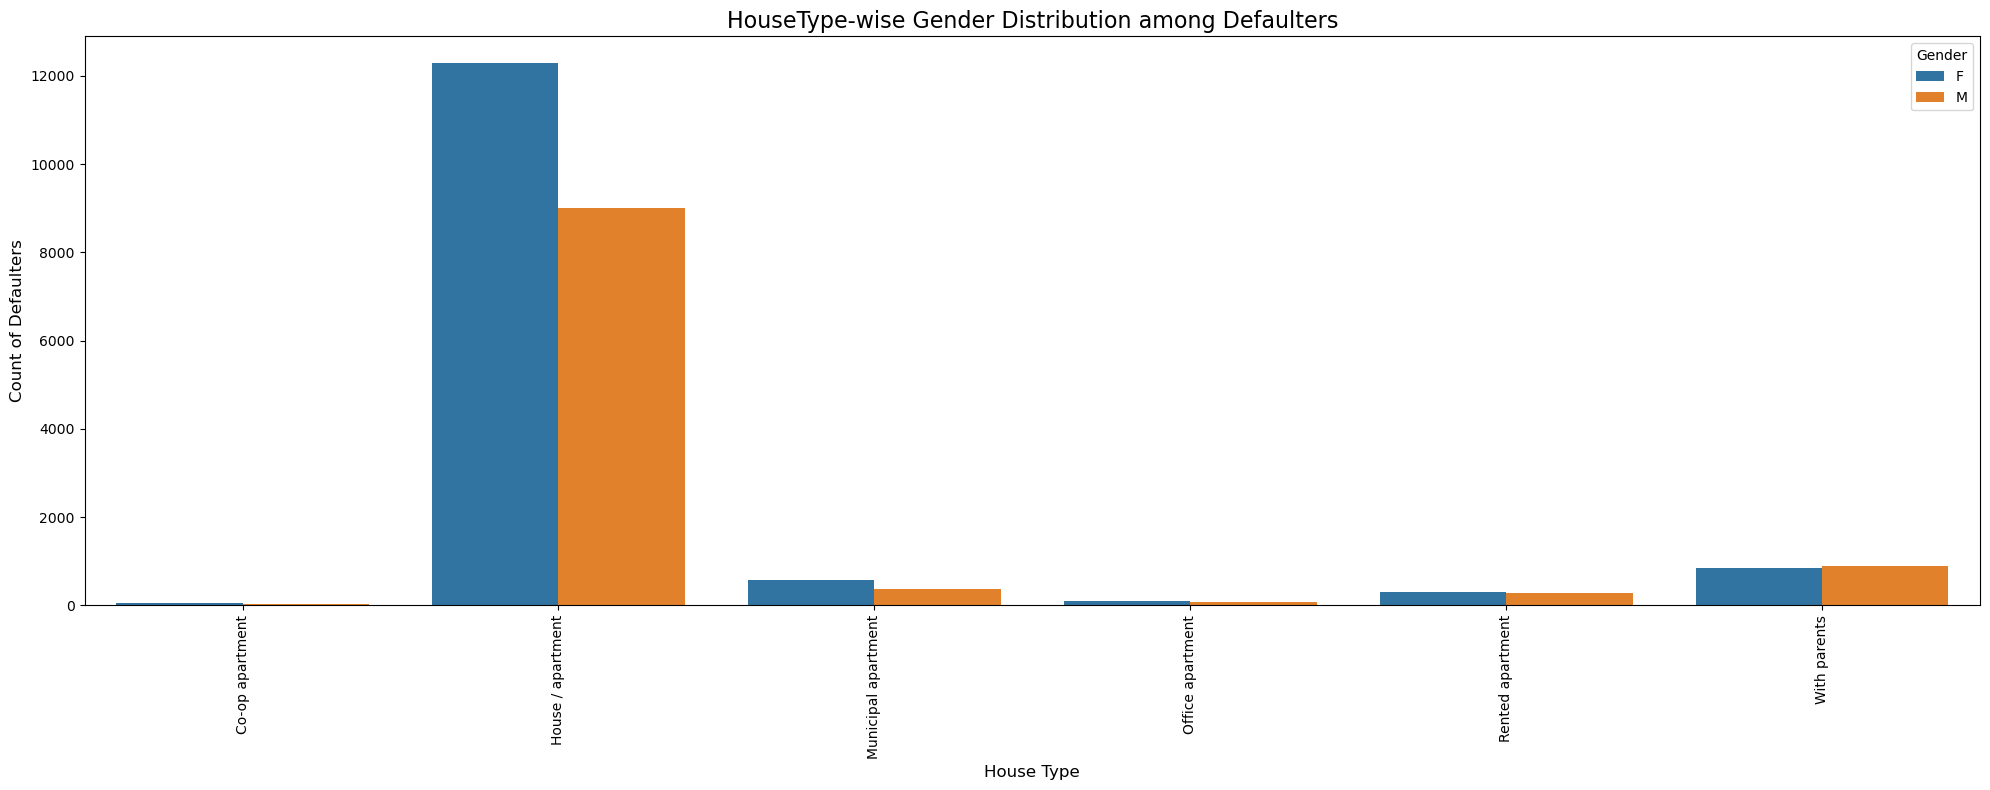

In [64]:
# Filter for defaulters (TARGET == 1)
gp_2_defaulters = gp_2[gp_2['TARGET'] == 1]

plt.figure(figsize=(20, 8))  # Fixed typo: 'figzie' ➤ 'figsize'
sns.barplot(
    data=gp_2_defaulters,
    x='NAME_HOUSING_TYPE',
    y='count',
    hue='CODE_GENDER'  # Missing comma above was fixed too
)
plt.title('HouseType-wise Gender Distribution among Defaulters', fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('House Type', fontsize=12)
plt.ylabel('Count of Defaulters', fontsize=12)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


Insights:
- Females who are staying in the apartments are more defaulters
- Males who are with parents are more defaulters

Let's create the age groups for clear analysi

In [65]:
bins = [0,25,35,45,55,65,100]
labels = ['<25','25-35', '35-45', '45-55','55-65','65+']
df['AGE_GROUP'] = pd.cut(df['YEARS_BIRTH'], bins=bins, labels=labels)
df['AGE_GROUP']

0         25-35
1         45-55
2         45-55
3         45-55
4         45-55
          ...  
307506    25-35
307507    55-65
307508    35-45
307509    25-35
307510    45-55
Name: AGE_GROUP, Length: 307509, dtype: category
Categories (6, object): ['<25' < '25-35' < '35-45' < '45-55' < '55-65' < '65+']

Now Let's compare Age and Target

In [66]:
age_target_df = df.groupby(['AGE_GROUP', 'TARGET']).size().reset_index(name='count')

C:\Users\Dell\AppData\Local\Temp\ipykernel_11052\4262352276.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_target_df = df.groupby(['AGE_GROUP', 'TARGET']).size().reset_index(name='count')


In [67]:
age_target_df

,AGE_GROUP,TARGET,count
0,<25,0,10678
1,<25,1,1497
2,25-35,0,64602
3,25-35,1,7718
4,35-45,0,77173
5,35-45,1,7083
6,45-55,0,65138
7,45-55,1,4944
8,55-65,0,57308
9,55-65,1,3282


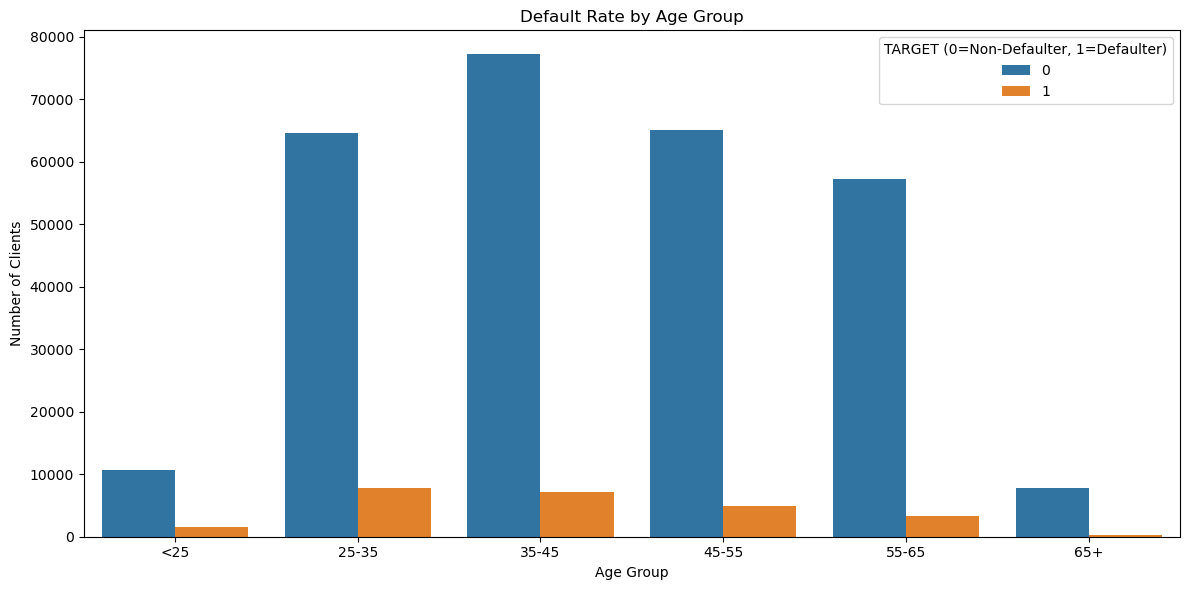

In [68]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=age_target_df,
    x='AGE_GROUP',
    y='count',
    hue='TARGET'
)
plt.title('Default Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Clients')
plt.legend(title='TARGET (0=Non-Defaulter, 1=Defaulter)')
plt.tight_layout()
plt.show()

Insights
- 25-35 Age group people are more defaulters
- 65+ Age group people are less defaulters

Let's Check Age Group with Gender v/s Target

In [69]:
gp_3 = df.groupby(['AGE_GROUP', 'CODE_GENDER', 'TARGET']).size().reset_index(name='count')
gp_3

C:\Users\Dell\AppData\Local\Temp\ipykernel_11052\1936033442.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gp_3 = df.groupby(['AGE_GROUP', 'CODE_GENDER', 'TARGET']).size().reset_index(name='count')


,AGE_GROUP,CODE_GENDER,TARGET,count
0,<25,F,0,5892
1,<25,F,1,763
2,<25,M,0,4786
3,<25,M,1,734
4,<25,XNA,0,0
5,<25,XNA,1,0
6,25-35,F,0,38121
7,25-35,F,1,4161
8,25-35,M,0,26479
9,25-35,M,1,3557


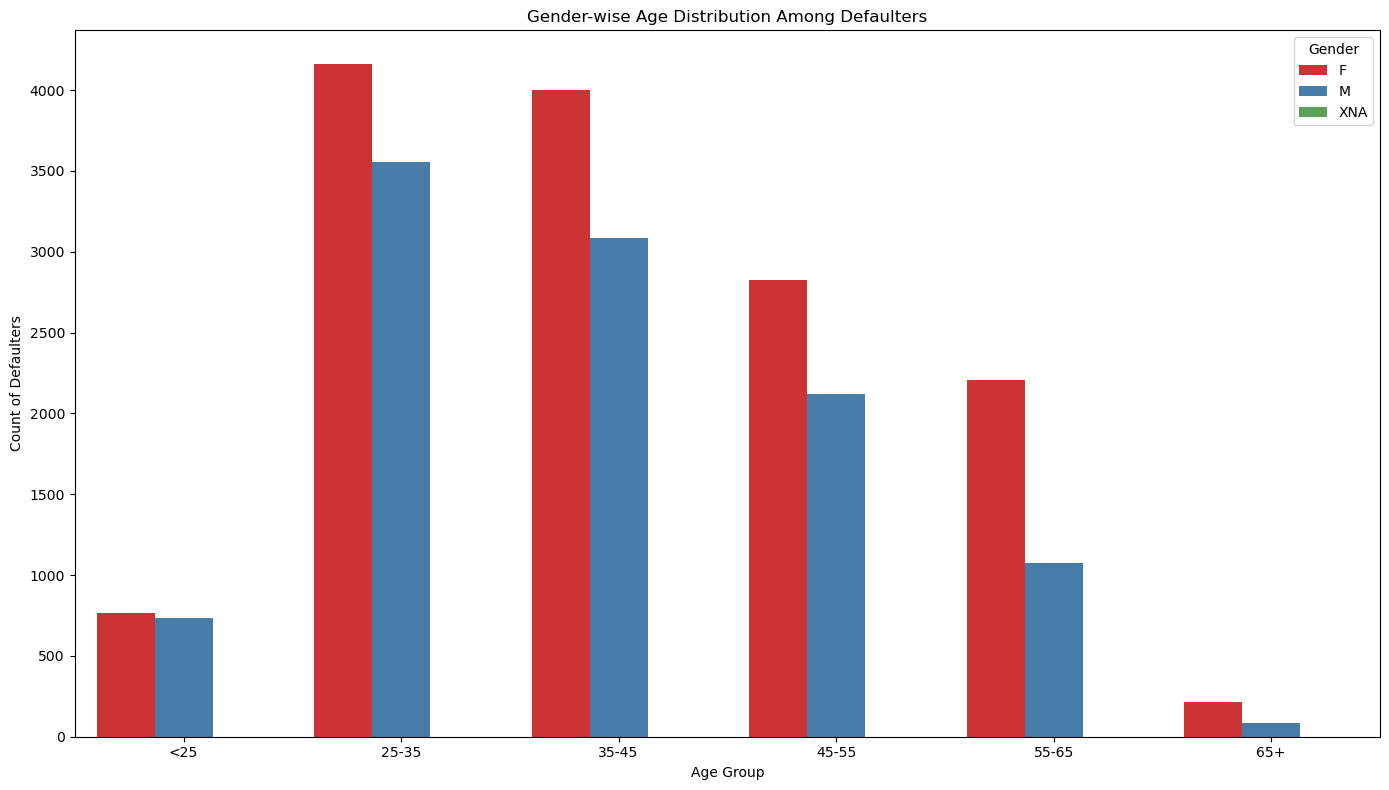

In [70]:
gp_3_defaulters = gp_3[gp_3['TARGET'] == 1]

plt.figure(figsize=(14, 8))
sns.barplot(
    data=gp_3_defaulters,
    x='AGE_GROUP',
    y='count',
    hue='CODE_GENDER',
    palette='Set1'
)
plt.title('Gender-wise Age Distribution Among Defaulters')
plt.xlabel('Age Group')
plt.ylabel('Count of Defaulters')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

Insights:
- Females are more defaulters in every age group, more specifically in 25-35 age group

##### Education v/s Target

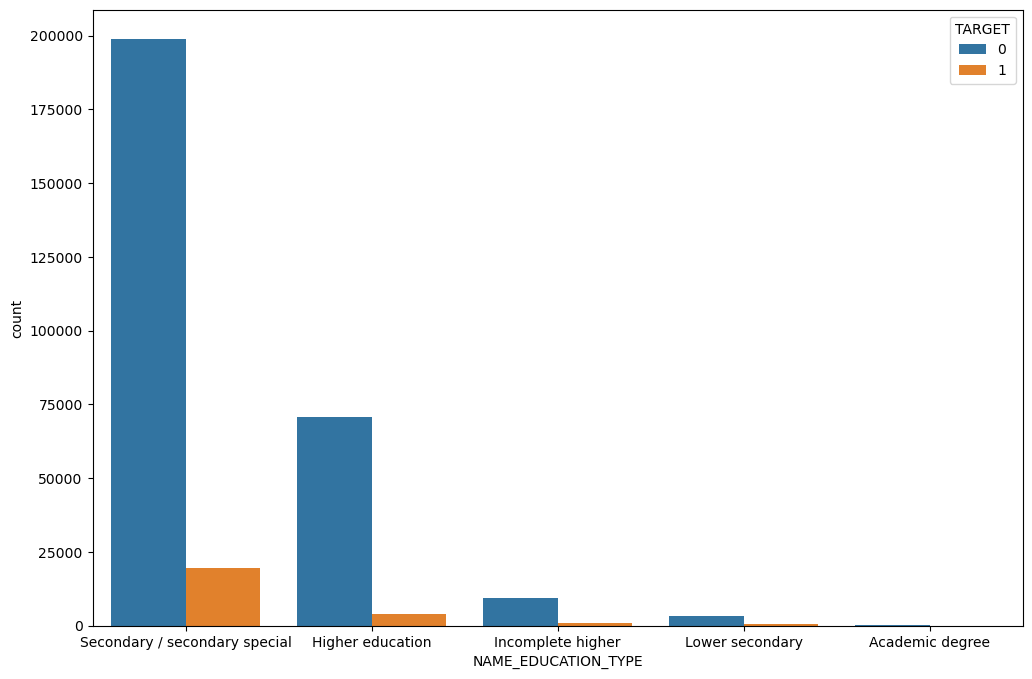

In [71]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='NAME_EDUCATION_TYPE', hue='TARGET')
plt.show()

Let's Combine Education+Gender and then will compare with Target

In [72]:
gp_4 = df.groupby(['NAME_EDUCATION_TYPE', 'CODE_GENDER', 'TARGET']).size().reset_index(name='count')
gp_4

,NAME_EDUCATION_TYPE,CODE_GENDER,TARGET,count
0,Academic degree,F,0,97
1,Academic degree,F,1,3
2,Academic degree,M,0,64
3,Higher education,F,0,47850
4,Higher education,F,1,2438
5,Higher education,M,0,23002
6,Higher education,M,1,1571
7,Higher education,XNA,0,1
8,Incomplete higher,F,0,5779
9,Incomplete higher,F,1,504


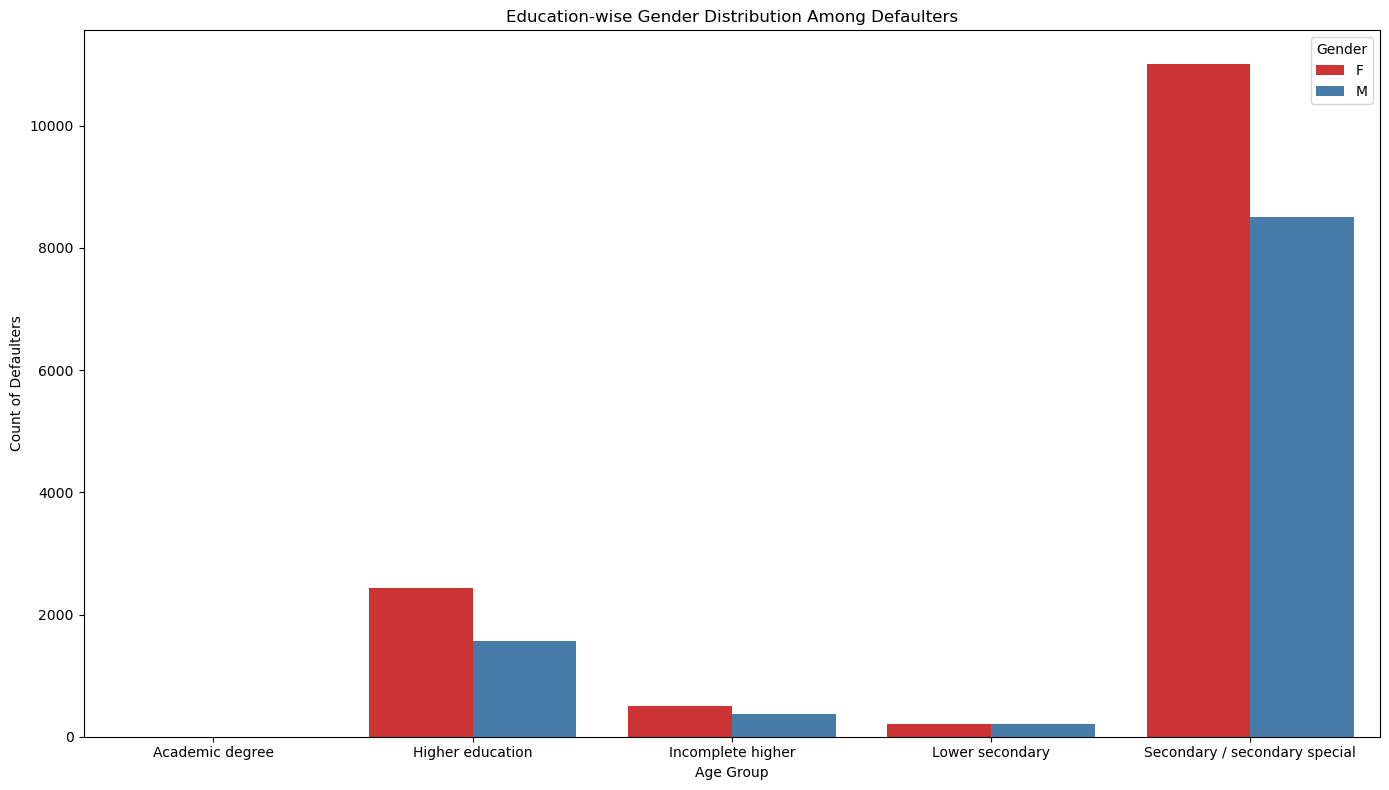

In [73]:
gp_4_defaulters = gp_4[gp_4['TARGET'] == 1]

plt.figure(figsize=(14, 8))
sns.barplot(
    data=gp_4_defaulters,
    x='NAME_EDUCATION_TYPE',
    y='count',
    hue='CODE_GENDER',
    palette='Set1'
)
plt.title('Education-wise Gender Distribution Among Defaulters')
plt.xlabel('Age Group')
plt.ylabel('Count of Defaulters')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

Insights:
- Femnales with Secondary Education are more defaulters

Car Owners v/s Target

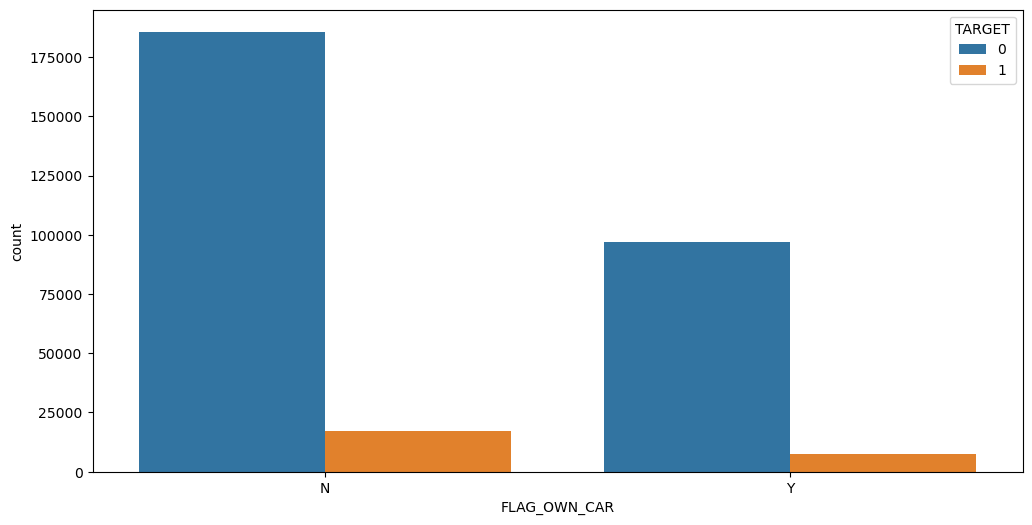

In [74]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='FLAG_OWN_CAR', hue='TARGET')
plt.show()

Insights
- Customers not having the car are more defaulters

House/Flat Owners v/s Target

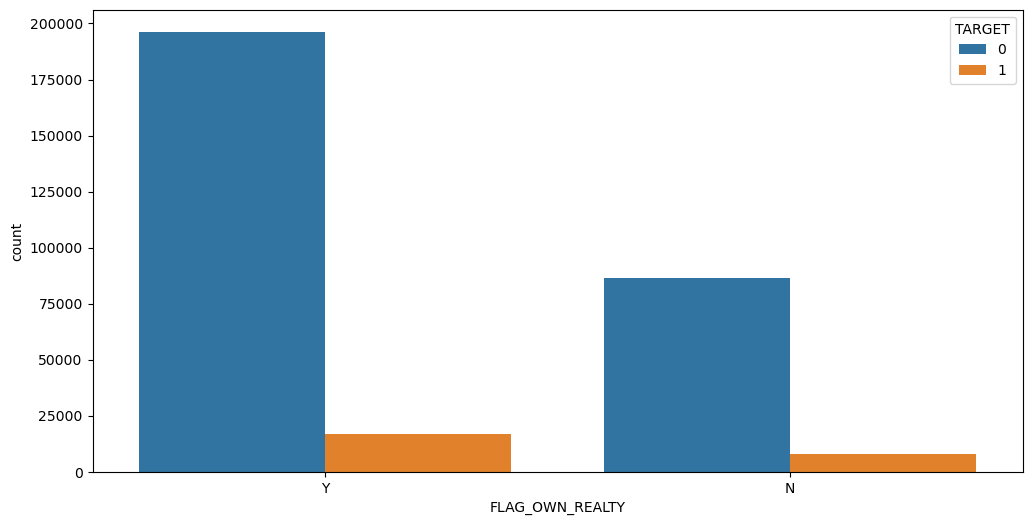

In [75]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='FLAG_OWN_REALTY', hue='TARGET')
plt.show()

Insights -
- Indiviuals having own flats/house are more defaulters

Income Type v/s Target

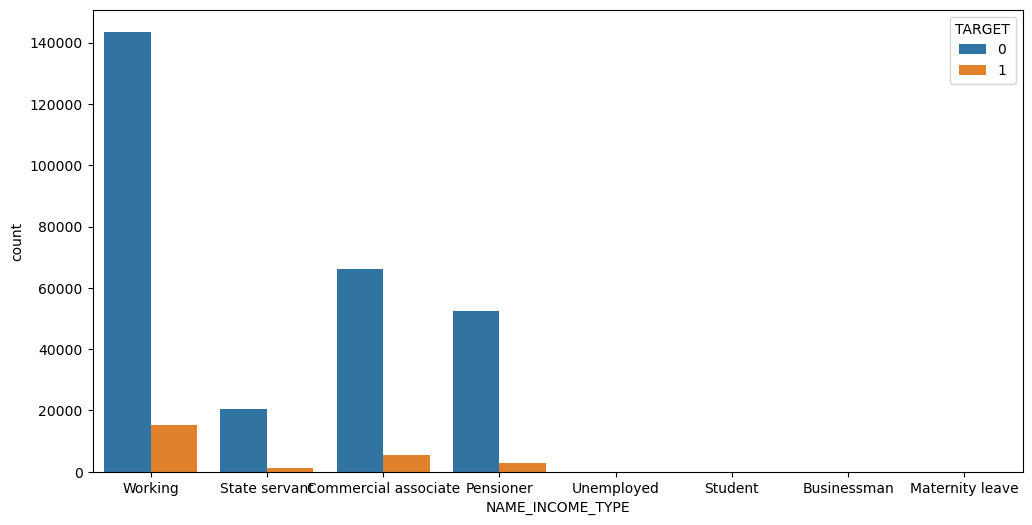

In [76]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='NAME_INCOME_TYPE', hue='TARGET')
plt.show()

Insights:
- Working Professionals are more defaulters

In [77]:
bins = np.linspace(df['AMT_INCOME_TOTAL'].min(), df['AMT_INCOME_TOTAL'].max(), num=6)

labels = ['<50k', '50k–100k', '100k–150k', '150k–200k', '200k–300k']
defaulters['INCOME_RANGE'] = pd.cut(defaulters['AMT_INCOME_TOTAL'], bins=bins, labels=labels)

income_dist = defaulters['INCOME_RANGE'].value_counts().sort_index()
income_dist

C:\Users\Dell\AppData\Local\Temp\ipykernel_11052\2717575109.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaulters['INCOME_RANGE'] = pd.cut(defaulters['AMT_INCOME_TOTAL'], bins=bins, labels=labels)


INCOME_RANGE
<50k         100669
50k–100k     115102
100k–150k     42444
150k–200k     13460
200k–300k      7727
Name: count, dtype: int64

C:\Users\Dell\AppData\Local\Temp\ipykernel_11052\3239363590.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=defaulters, x='INCOME_RANGE', order=labels, palette='Blues_r')


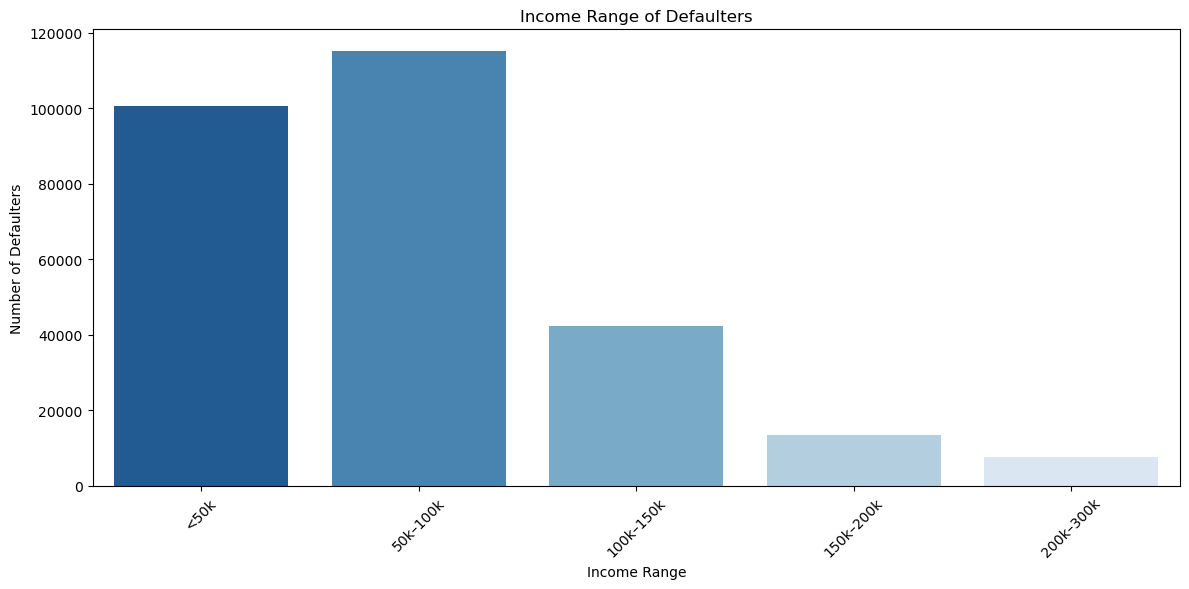

In [78]:
plt.figure(figsize=(12, 6))
sns.countplot(data=defaulters, x='INCOME_RANGE', order=labels, palette='Blues_r')
plt.title('Income Range of Defaulters')
plt.xlabel('Income Range')
plt.ylabel('Number of Defaulters')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights:
- People having the income between 50k-100k are more defaulters and <50k income people comes at second place

#### Handling the Previous Data

##### Data Loading 

In [79]:
p_df = pd.read_csv(r"C:\Users\Dell\Downloads\previous_application.csv")
p_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
p_df.shape

(1670214, 37)

In [81]:
df.shape

(307509, 50)

In [82]:
p_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [83]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'F

In the above codes we have compared both the analysed data and the previosu data which needs to be analysed

#### Handling the Missing Values 

In [84]:
(p_df.isnull().sum()/len(p_df)*100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

Let's Drop the columns having more than 40% of missing values

In [85]:
cols_above_40 = p_df.columns[p_df.isnull().sum() / len(p_df) * 100 > 40]

In [86]:
p_df.drop(columns = cols_above_40, inplace=True)

In [87]:
# Rechecking the count of missing values

(p_df.isnull().sum()/len(p_df)*100).sort_values(ascending=False)

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

1. `AMT_GOODS_PRICE`

In [88]:
p_df.AMT_GOODS_PRICE.dtype

dtype('float64')

In [89]:
p_df.AMT_GOODS_PRICE.describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

Data is positively skewed as mean > median. Let's impute with median

In [90]:
p_df['AMT_GOODS_PRICE'].fillna(p_df['AMT_GOODS_PRICE'].median(), inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_11052\3693786014.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  p_df['AMT_GOODS_PRICE'].fillna(p_df['AMT_GOODS_PRICE'].median(), inplace=True)


2. `AMT_ANNUITY`

In [91]:
p_df.AMT_ANNUITY.dtype

dtype('float64')

In [92]:
p_df.AMT_ANNUITY.describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

Here also we can impute with median

In [93]:
p_df['AMT_ANNUITY'].fillna(p_df['AMT_ANNUITY'].median(), inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_11052\439217015.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  p_df['AMT_ANNUITY'].fillna(p_df['AMT_ANNUITY'].median(), inplace=True)


3. `CNT_PAYMENT`

In [94]:
p_df.CNT_PAYMENT.dtype

dtype('float64')

In [95]:
p_df.CNT_PAYMENT.describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

In [96]:
p_df['CNT_PAYMENT'].fillna(p_df['CNT_PAYMENT'].median(), inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_11052\2567062121.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  p_df['CNT_PAYMENT'].fillna(p_df['CNT_PAYMENT'].median(), inplace=True)


4. `Product Combination`

In [97]:
p_df.dropna(subset=['PRODUCT_COMBINATION'], inplace=True)

As the missing value count was very less, those rows has been dropped from the data

In [98]:
# Let's check the data again
p_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

Let's Drop the unwanted columns

In [105]:
unwanted_cols = ['SK_ID_PREV', 'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY']
p_df.drop(columns=unwanted_cols, inplace = True)

KeyError: "['SK_ID_PREV', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY'] not found in axis"

In [106]:
p_df.shape

(1669868, 21)

##### Handling Outliers

In [101]:
numeric_cols = p_df.select_dtypes(include = ['int64','float64']).columns

for col in numeric_cols:
    Q1 = p_df[col].quantile(0.25)
    Q3 = p_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_p_df = p_df[(p_df[col] < lower_bound) | (p_df[col] > upper_bound)]
    print(f"{col} --> outliers count: {len(outliers_p_df)}")

SK_ID_CURR --> outliers count: 0
AMT_ANNUITY --> outliers count: 162556
AMT_APPLICATION --> outliers count: 208014
AMT_CREDIT --> outliers count: 180004
AMT_GOODS_PRICE --> outliers count: 236026
DAYS_DECISION --> outliers count: 17571
SELLERPLACE_AREA --> outliers count: 268084
CNT_PAYMENT --> outliers count: 344916


In [102]:
cols_to_pdf_cap = ['AMT_ANNUITY','AMT_CREDIT', 'AMT_GOODS_PRICE']

for col in cols_to_pdf_cap:
    lower_cap = p_df[col].quantile(0.01)
    upper_cap = p_df[col].quantile(0.99)
    p_df[col] = p_df[col].clip(lower=lower_cap, upper=upper_cap)

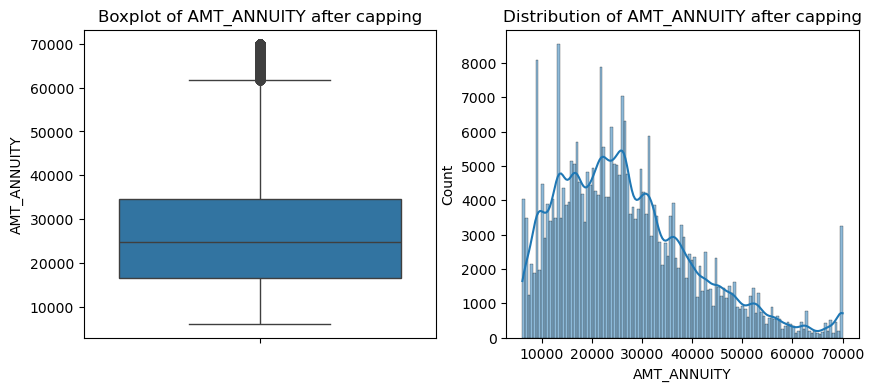

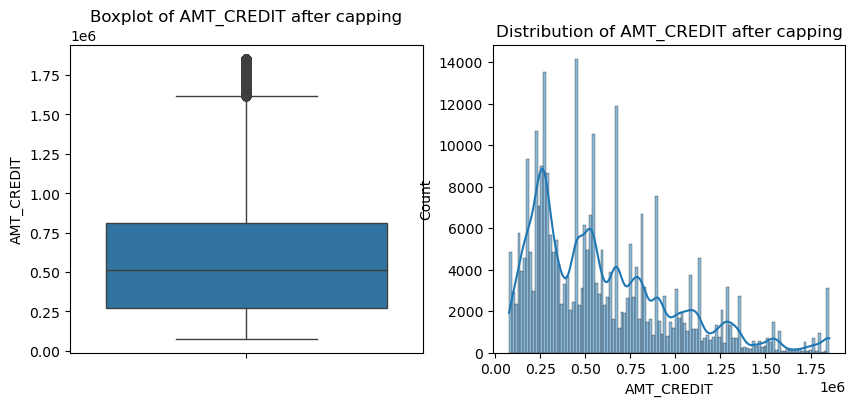

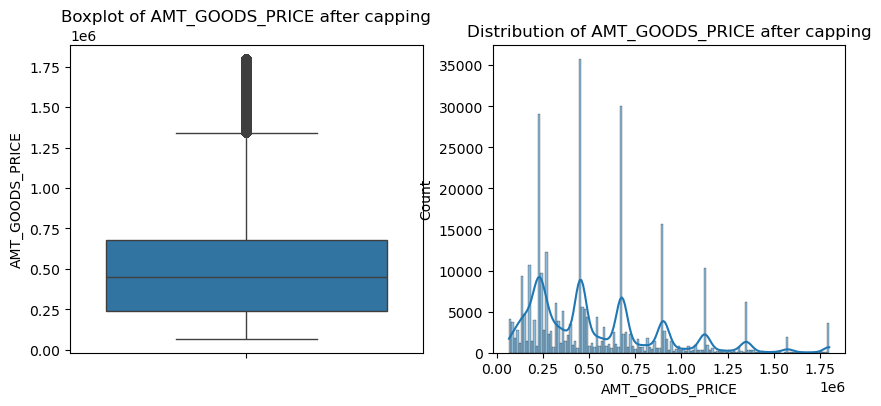

In [103]:
for col in cols_to_pdf_cap:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col} after capping')
    plt.subplot(1,2,2)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col} after capping')
    plt.show()

Capping has been worked since the outliers are now continuos in the imp columns

#### Univariate and Bivariate Analysis

Before doing the univariate analysis, Let's Merge the data

In [ ]:
df_merged = 

In [107]:
p_df.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [104]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'F

In [108]:
# Numeric aggregations
p_df_agg = p_df.groupby('SK_ID_CURR').agg({
    'AMT_ANNUITY': 'mean',
    'AMT_APPLICATION': 'mean',
    'AMT_CREDIT': 'mean',
    'AMT_GOODS_PRICE': 'mean',
    'CNT_PAYMENT': 'mean',
    'SELLERPLACE_AREA': 'mean'
}).reset_index()

# Rename for clarity
p_df_agg.columns = [
    'SK_ID_CURR', 
    'PREV_AMT_ANNUITY', 
    'PREV_AMT_APPLICATION', 
    'PREV_AMT_CREDIT', 
    'PREV_AMT_GOODS_PRICE', 
    'PREV_CNT_PAYMENT',
    'PREV_SELLERPLACE_AREA'
]

In [109]:
merged_df = df.merge(p_df_agg, on='SK_ID_CURR', how='left')
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,AGE_GROUP,PREV_AMT_ANNUITY,PREV_AMT_APPLICATION,PREV_AMT_CREDIT,PREV_AMT_GOODS_PRICE,PREV_CNT_PAYMENT,PREV_SELLERPLACE_AREA
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-2120,Laborers,1.0,2,2,0,0,Business Entity Type 3,0.262949,0.139376,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,25.92,1.75,25-35,9251.775,179055.00,179055.00,179055.00,24.000000,500.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-291,Core staff,2.0,1,1,0,0,School,0.622246,0.535276,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,45.93,3.25,45-55,45687.825,435436.50,484191.00,435436.50,10.000000,533.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-2531,Laborers,1.0,2,2,0,0,Government,0.555912,0.729567,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,52.18,0.62,45-55,5357.250,24282.00,20106.00,24282.00,4.000000,30.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-2437,Laborers,2.0,2,2,0,0,Business Entity Type 3,0.650442,0.535276,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,52.07,8.33,45-55,19517.450,272203.26,291695.50,309643.26,19.333333,894.222222
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3458,Core staff,1.0,2,2,0,0,Religion,0.322738,0.535276,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,54.61,8.32,45-55,12348.090,150530.25,166638.75,150530.25,20.666667,409.166667


In [111]:
merged_df.shape

(307509, 56)

In [118]:
(merged_df.isnull().sum()/len(merged_df)*100).sort_values(ascending=False)

PREV_SELLERPLACE_AREA          5.350087
PREV_CNT_PAYMENT               5.350087
PREV_AMT_GOODS_PRICE           5.350087
PREV_AMT_CREDIT                5.350087
PREV_AMT_APPLICATION           5.350087
PREV_AMT_ANNUITY               5.350087
FLAG_DOCUMENT_15               0.000000
FLAG_DOCUMENT_6                0.000000
FLAG_DOCUMENT_7                0.000000
FLAG_DOCUMENT_8                0.000000
FLAG_DOCUMENT_9                0.000000
FLAG_DOCUMENT_10               0.000000
FLAG_DOCUMENT_11               0.000000
FLAG_DOCUMENT_12               0.000000
FLAG_DOCUMENT_13               0.000000
FLAG_DOCUMENT_14               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_16               0.000000
FLAG_DOCUMENT_17               0.000000
TARGET                         0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_21               0.000000
AMT_REQ_CREDIT_BUREAU_YEAR     0.000000
YEARS_BIRTH                    0.000000


Let's impute 0 for the missing values in the merged dataset


In [119]:
prev_num_cols = [
    'PREV_AMT_ANNUITY', 'PREV_AMT_APPLICATION', 'PREV_AMT_CREDIT',
    'PREV_AMT_GOODS_PRICE', 'PREV_CNT_PAYMENT', 'PREV_SELLERPLACE_AREA'
]
merged_df[prev_num_cols] = merged_df[prev_num_cols].fillna(0)

All the missing values has been handled now

#### Univariate, Bivariate Analysis

In [122]:
merged_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'F

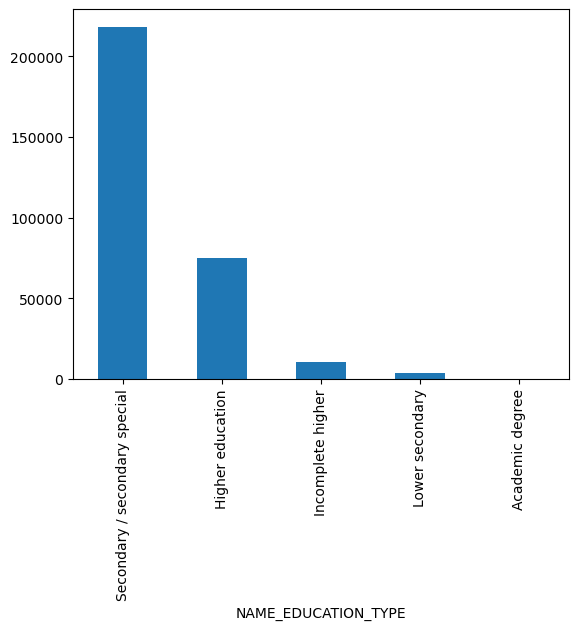

In [126]:
merged_df.NAME_EDUCATION_TYPE.value_counts().plot.bar()
plt.show()

Insights:
Customers with Secondary education are more